## **Least Squares Regression in Python** 

Recall that if we enumerate the estimation of the data at each data point, $x_i$, this gives us the following system of equations:

<font color="cyan">Note: m points, n features (functions)</font>
\begin{aligned}
&&\hat{y}(x_1) = {\alpha}_1 f_1(x_1) + {\alpha}_2 f_2(x_1) + \cdots + {\alpha}_n f_n(x_1),\\
&&\hat{y}(x_2) = {\alpha}_1 f_1(x_2) + {\alpha}_2 f_2(x_2) + \cdots + {\alpha}_n f_n(x_2),\\
&&\qquad\qquad\qquad\qquad\qquad \cdots\\
&&\hat{y}(x_m) = {\alpha}_1 f_1(x_m) + {\alpha}_2 f_2(x_m) + \cdots + {\alpha}_n f_n(x_m).
\end{aligned}


If the data was absolutely perfect (i.e., no noise), then the estimation function would go through all the data points, resulting in the following system of equations:


\begin{aligned}
&&y_1 = {\alpha}_1 f_1(x_1) + {\alpha}_2 f_2(x_1) + \cdots + {\alpha}_n
f_n(x_1),\\
&&y_2 = {\alpha}_1 f_1(x_2) + {\alpha}_2 f_2(x_2) + \cdots + {\alpha}_n
f_n(x_2),\\
&&\qquad\qquad\qquad\qquad\cdots\\
&&y_m = {\alpha}_1 f_1(x_m) + {\alpha}_2 f_2(x_m) + \cdots + {\alpha}_n f_n(x_m).
\end{aligned}
<br/>

If we take $A$ to be as defined previously, this would result in the matrix equation
$$
\textbf{A $\beta$} = \textbf{Y} .
$$
<br/>

However, since the data is not perfect, there will not be an $\textit{estimation function}$ that can go through all the data points, and this system will have $\textit{no solution}$. Therefore, we need to use the least square regression that we derived in the previous two sections to get a solution.   
<br/>

$$
A^+ \textbf{A$\beta$} = A^+ \textbf{y} 
$$
$$
\textbf{$\beta$} = (A^T A)^{-1} A^T \textbf{y}
$$.  
<br/>

**TRY IT!** Consider the artificial data created by `x = np.linspace(0, 1, 101)}` and `y = 1 + x + x * np.random.random(len(x))`. 

Do a least squares regression with an estimation function defined by $\hat{y}=\alpha_1x+\alpha_2$. Plot the data points along with the least squares regression. Note that we expect $\alpha_1=1.5$ and $\alpha_2=1.0$ based on this data. Due to the random noise we added into the data, your results maybe slightly different.   


#### <font color="cyan">**Method I. Use direct inverse method**</font>

In [1]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
"""
example 6.1 Using Least Square Regression by 4 approaches
"""
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

In [3]:
# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T
# print(A)
# print(A.shape)

# turn y into a column vector
y = y[:, np.newaxis]
print(y.shape)
# print(y)

(101, 1)


#### <font color="cyan">**Method I: Direct Invserse Method**</font>

In [10]:
# Direct least square regression
import numpy.linalg
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)), y)
# pseudo = np.dot(np.linalg.inv(np.dot(A.T,A)), A.T)
# alpha = np.dot(pseudo,y)
# print(pseudo)

print(alpha)

[[1.44190578]
 [1.01065989]]


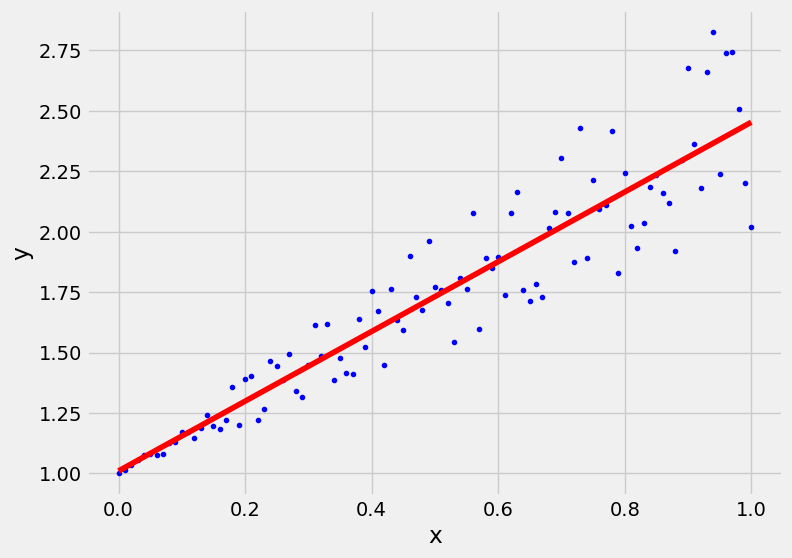

In [11]:
# plot the results
plt.figure(figsize = (8,6))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In Python, there are many different ways to conduct the least square regression. For example, we can use packages as *numpy*, *scipy*, *statsmodels*, *sklearn* and so on to get a least square solution. Here we will use the above example and introduce you more ways to do it. Feel free to choose one you like. 

#### <font color="cyan">**Method II: Use the Pseudoinverse via NumPy**</font>

We talked before that the $(A^T A)^{-1} A^T$ is called the pseudo-inverse, therefore, we could use the `np.linalg.pinv(A)` function in NumPy. 

In [6]:
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

[[1.44190578]
 [1.01065989]]


#### <font color="cyan">**Method III: Use the Least Squares Functions**</font>

Actually, NumPy has already implemented the least square methods that we can just call the function to get a solution. The function `np.linalg.lstsq(A,y)` will return more things than the solution itself, please check the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html) for details. 

In [12]:
alpha = np.linalg.lstsq(A, y, rcond=None)[0]
print(alpha)

[[1.44190578]
 [1.01065989]]


#### <font color="cyan">**Method IV: Use the Optimization via SciPy**</font>

This scipy function `optimize.curve_fit()` is actually very powerful, that it can fit not only linear functions, but many different function forms, such as non-linear function. Here we will show the linear example from above. Note that, using this function, we don't need to turn y into a column vector. 

In [13]:
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

In [14]:
# guess the "featuring function" as the prior information
from scipy import optimize
 
def func(x, a, b):
    y = a*x + b
    return y

alpha = optimize.curve_fit(func, xdata = x, ydata = y)[0]
print(alpha)

[1.5804278  0.99034414]
